In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import islice, cycle

In [2]:
data_path = './data/'

quarterly_df = pd.read_csv(f'{data_path}spotify-quarterly.csv')
apk_df = pd.read_csv(f'{data_path}apk.csv', parse_dates=['Date'])

# Quarterly APK downloads

In order to compare apk downloads with financial metrics, it is necessary to aggregate data by quarter.

In [3]:
apk_df.set_index('Date', inplace=True)
apk_quarterly_df = apk_df['Downloads'].resample('QE').sum().to_frame()
apk_df.reset_index(inplace=True)
apk_quarterly_df.reset_index(inplace=True)

In [4]:
apk_quarterly_df['Year'] = apk_quarterly_df['Date'].dt.year 
apk_quarterly_df['Quarter'] = apk_quarterly_df['Date'].dt.quarter 
apk_quarterly_df['Date'] = apk_quarterly_df['Year'].astype(str) + ' – Q' + apk_quarterly_df['Quarter'].astype(str)

# Quarterly financial data

We create a ```Date``` field to store in a single value the information about year and quarter.

In [5]:
quarterly_df['Date'] = quarterly_df['Year'].astype(str) + ' – Q' + quarterly_df['Quarter'].astype(str)
quarterly_df = quarterly_df.sort_values('Date')

In [6]:
# for metric in quarterly_df.columns.drop(['Date', 'Year', 'Quarter']):
#     plt.figure()
#     plt.bar(quarterly_df['Date'], quarterly_df[metric])
#     plt.title(metric)
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

In [7]:
def generate_colors(n):
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n = min(n, len(color_cycle))

    return color_cycle[:n]

In [8]:
events = {'Event': ['Harry Style\'s Fine Line',
                    'The Weeknd\'s After Hours',
                    'Taylor Swift\'s Fearless'],
          'Date': ['2019-12-13',
                   '2020-03-20',
                   '2021-04-09']}
events_df = pd.DataFrame(events)

generate_colors(len(events_df))

['#1f77b4', '#ff7f0e', '#2ca02c']

In [9]:
# events = {'Event': ['Harry Style\'s Fine Line',
#                     'The Weeknd\'s After Hours',
#                     'Taylor Swift\'s Fearless'],
#           'Date': ['2019-12-13',
#                    '2020-03-20',
#                    '2021-04-09']}

# events_df = pd.DataFrame(events)
# events_df['Date'] = pd.to_datetime(events_df['Date'])

# ymin = apk_df['Downloads'].min()
# ymax = apk_df['Downloads'].max()

# colors = generate_colors(len(events_df) + 1)[1:]

# plt.figure(figsize=(10, 6))
# for index, row in events_df.iterrows():
#     plt.vlines(x=row['Date'], ymin=ymin, ymax=ymax, color=colors[index], linestyles='--', label=row['Event'])

# plt.scatter(apk_df['Date'], apk_df['Downloads'], marker='o', s=5)
# plt.title('APK downloads')
# plt.xlabel('Release date')
# plt.ylabel('# of downloads')
# plt.legend()
# plt.show()

# Correlation between Premium MAUs and APK downloads

It is first necessary to truncate the two series, in order to compare them in the same time interval (2017Q3 – 2023Q4).

In [12]:
start_date = max(quarterly_df['Date'].min(), apk_quarterly_df['Date'].min())
end_date = min(quarterly_df['Date'].max(), apk_quarterly_df['Date'].max())

trunc_quarterly_df = quarterly_df[
    (quarterly_df['Date'] >= start_date) &
    (quarterly_df['Date'] <= end_date)
]

trunc_apk_quarterly_df = apk_quarterly_df[
    (apk_quarterly_df['Date'] >= start_date) &
    (apk_quarterly_df['Date'] <= end_date)
]

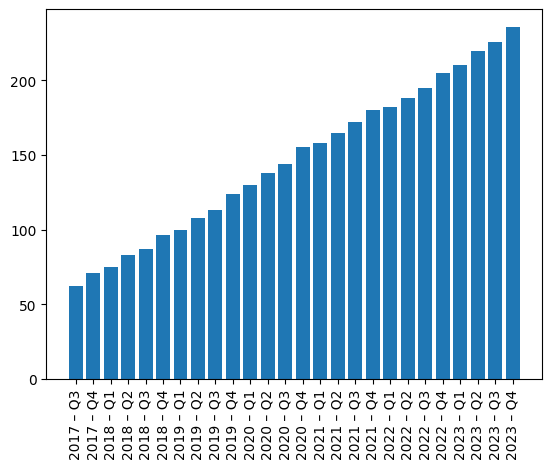

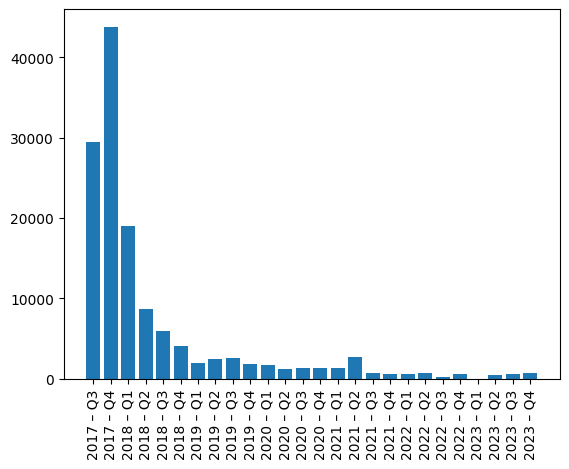

In [11]:
plt.figure()
plt.bar(trunc_quarterly_df['Date'], trunc_quarterly_df['Premium MAUs'])
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.bar(trunc_apk_quarterly_df['Date'], trunc_apk_quarterly_df['Downloads'])
plt.xticks(rotation=90)
plt.show()

In [14]:
pearson_corr = trunc_quarterly_df['Premium MAUs'].corr(trunc_apk_quarterly_df['Downloads'], method='pearson')
print(pearson_corr)

0.6391780053158126
